In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [2]:
df = pd.read_csv('/content/placement_linear_regression.csv')
df.shape

(200, 2)

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

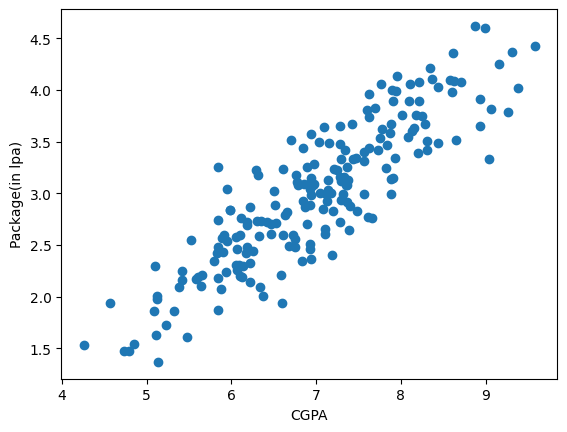

In [5]:
plt.scatter(df['cgpa'] , df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [6]:
x = df.iloc[:,0]
y = df.iloc[:,-1]

x.shape , y.shape

((200,), (200,))

In [7]:
x

0      6.89
1      5.12
2      7.82
3      7.42
4      6.94
       ... 
195    6.93
196    5.89
197    7.21
198    7.63
199    6.22
Name: cgpa, Length: 200, dtype: float64

In [8]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [13]:
x_train , x_test , y_train , y_test  = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160,)
(40,)
(160,)
(40,)


In [20]:
lr = LinearRegression ()
lr.fit(x_train.values.reshape(-1 , 1) , y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(x_test.values.reshape(-1,1))

Text(0, 0.5, 'package (in lacks)')

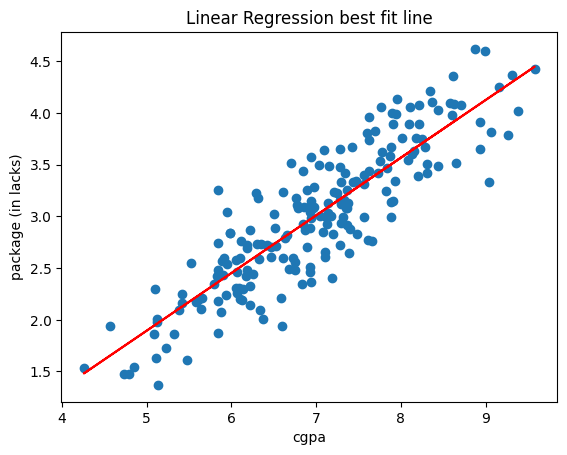

In [27]:
plt.scatter(df['cgpa'] , df['package'])
plt.plot(x_train , lr.predict(x_train.values.reshape(-1,1)) , color = 'red')
plt.title('Linear Regression best fit line')
plt.xlabel('cgpa')
plt.ylabel('package (in lacks)')

In [31]:
print('MAE : ' , mean_absolute_error(y_test , y_pred) )

MAE :  0.2884710931878175


In [32]:
print('MSE : ', mean_squared_error(y_test , y_pred))

MSE :  0.12129235313495527


In [33]:
print('RMSE : ', np.sqrt(mean_squared_error(y_test , y_pred)))

RMSE :  0.34827051717731616


In [34]:
print('R2 score : ', r2_score(y_test , y_pred))

R2 score :  0.780730147510384


In [41]:
x_test.shape

(40,)

In [40]:
r2 = r2_score(y_test , y_pred)
n = x_test.shape[0] # no of rows
# k = x_test.shape[1] # no of input columns
k = 1 # here no columns means 1 column

adj_r2 = 1 - ((1 - r2) * (n - 1) ) / (n - 1 - k)

print('adjusted R2 score : ' , adj_r2)

adjusted R2 score :  0.7749598882343415


In [43]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

# new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.shape

(200, 3)

In [44]:
new_df1.head()

,cgpa,package,random_feature
0,6.89,3.26,0.059633
1,5.12,1.98,0.267063
2,7.82,3.25,0.260258
3,7.42,3.67,0.432397
4,6.94,3.57,0.457629


Text(0, 0.5, 'Package(in lpa)')

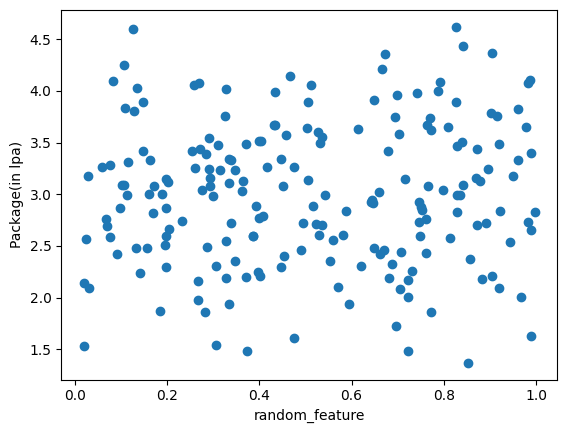

In [46]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [47]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [52]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [53]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score -0.019799844999510485


In [67]:
1 - ((1-r2)*(40-1)/(40-1-2))

-0.07492416094542986

In [68]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [69]:
new_df2.sample(5)

,cgpa,iq,package
8,6.09,1.51,2.31
19,7.48,3.33,2.83
131,6.37,1.61,2.01
30,7.36,3.46,3.26
133,6.05,1.48,2.58


Text(0, 0.5, 'Package(in lpa)')

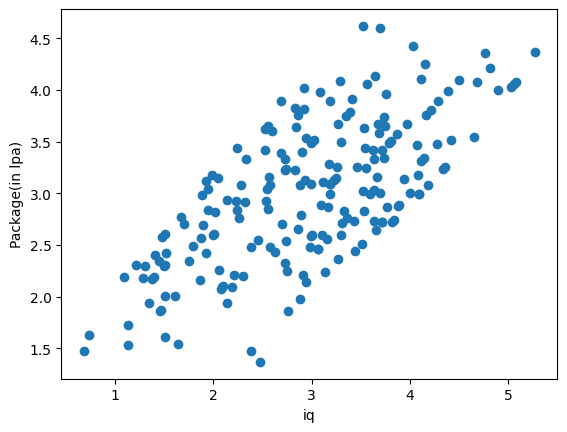

In [70]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [71]:
np.random.randint(-100,100)

-12

In [72]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [74]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [75]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8130582079594548


In [76]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8029532462275335

r2 adjusted is decreases when irrelevent column is added